# Intermediate level task 2 by Suraj Yadav

# Prediction using Decision Tree Algorithm

In [166]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns
sns.set_palette('Paired')

import warnings
warnings.filterwarnings('ignore')

In [167]:
# import the dataset
df=pd.read_csv("C:/Users/Admin/Desktop/Iris.csv")
df.head()  # displaying  first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
# displaying the bottom 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [92]:
# checking the shape of the dataset
df.shape

(150, 6)

In [93]:
# displaying the columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Data Preparation

In [94]:
# showing the data types
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [95]:
# check for duplicated values
df.duplicated().sum()

0

In [96]:
# check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [97]:
# displaying nunique value
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

#### ID column has 150 unique values, so we have to drop this.

In [98]:
# drop id column
df.drop("Id", axis=1, inplace=True)

In [99]:
# displaying columns
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [100]:
# Now, renaming the columns
df.columns=["Sepal_length","Sepal_width","Petal_length","Petal_width","species"]

In [101]:
df.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'species'],
      dtype='object')

In [102]:
# getting the information related to dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [103]:
# getting the statistical data from dataset
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Graphical Analysis

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

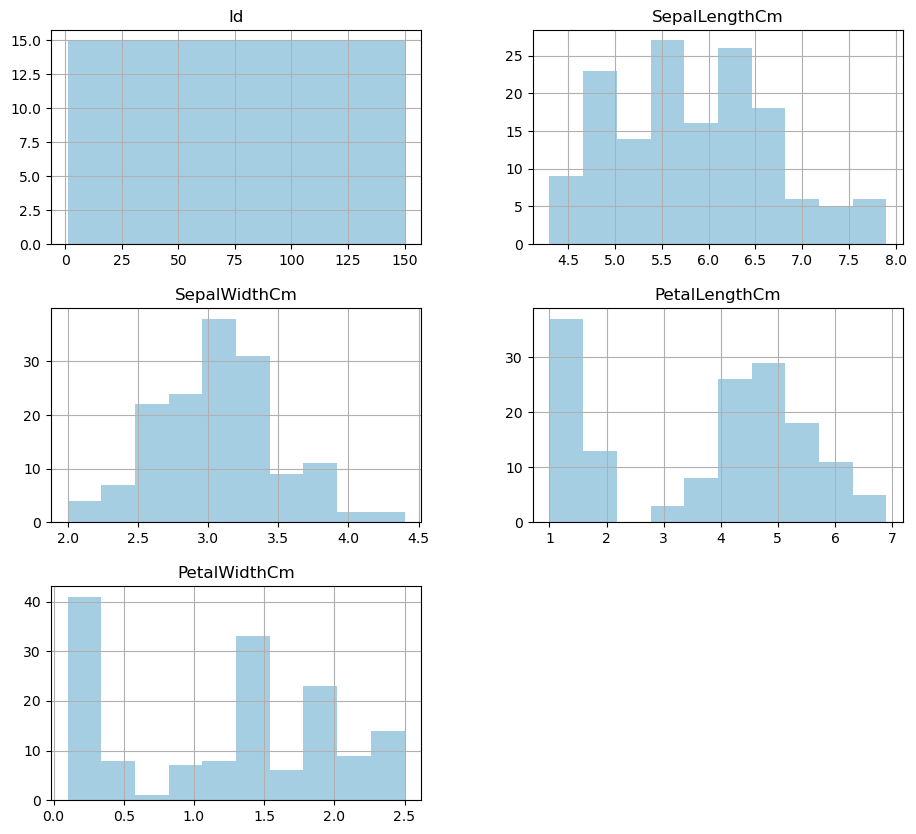

In [178]:
df.hist(figsize=(11,10))

<AxesSubplot:>

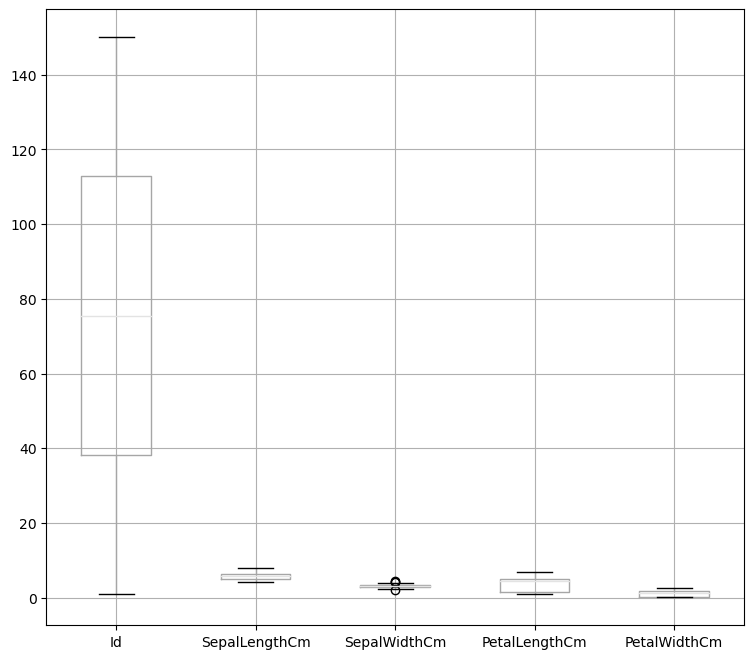

In [183]:
# plot the boxplot
plt.figure(figsize=(9,8))
df.boxplot()

In [107]:
a1=df["species"].value_counts()
a1

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

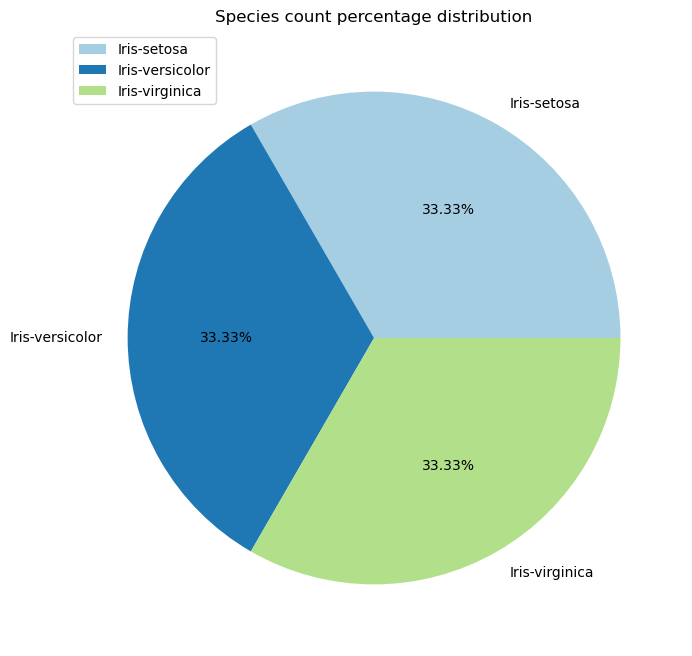

In [172]:
plt.figure(figsize=(10,8))
plt.pie(a1.values, labels=a1.index, autopct='%.2f%%')
plt.title("Species count percentage distribution")
plt.legend()
plt.show()

In [108]:
# find a correlation
corr=df.corr()
corr

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

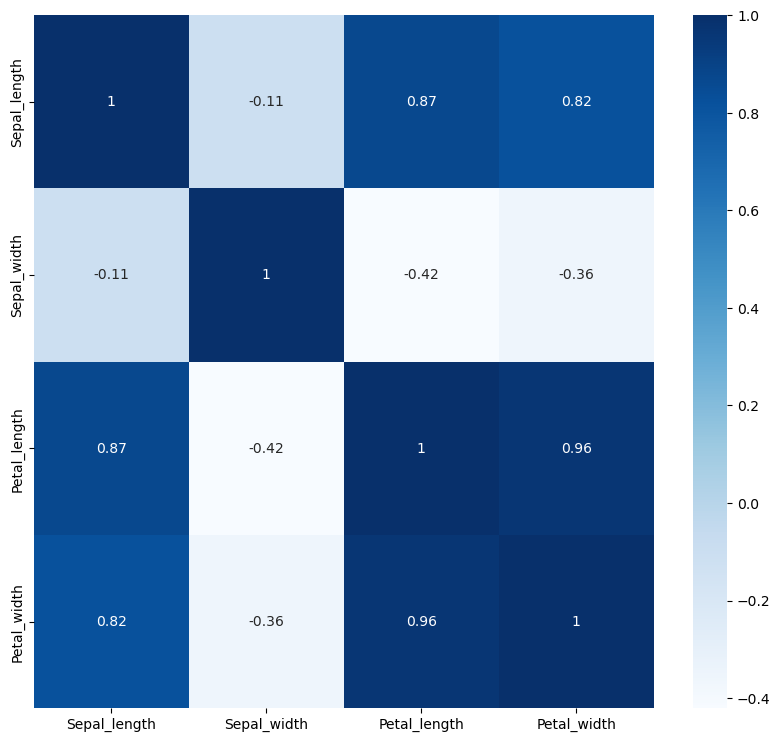

In [177]:
plt.figure(figsize=(10,9))
sns.heatmap(corr, annot=True, cmap="Blues")

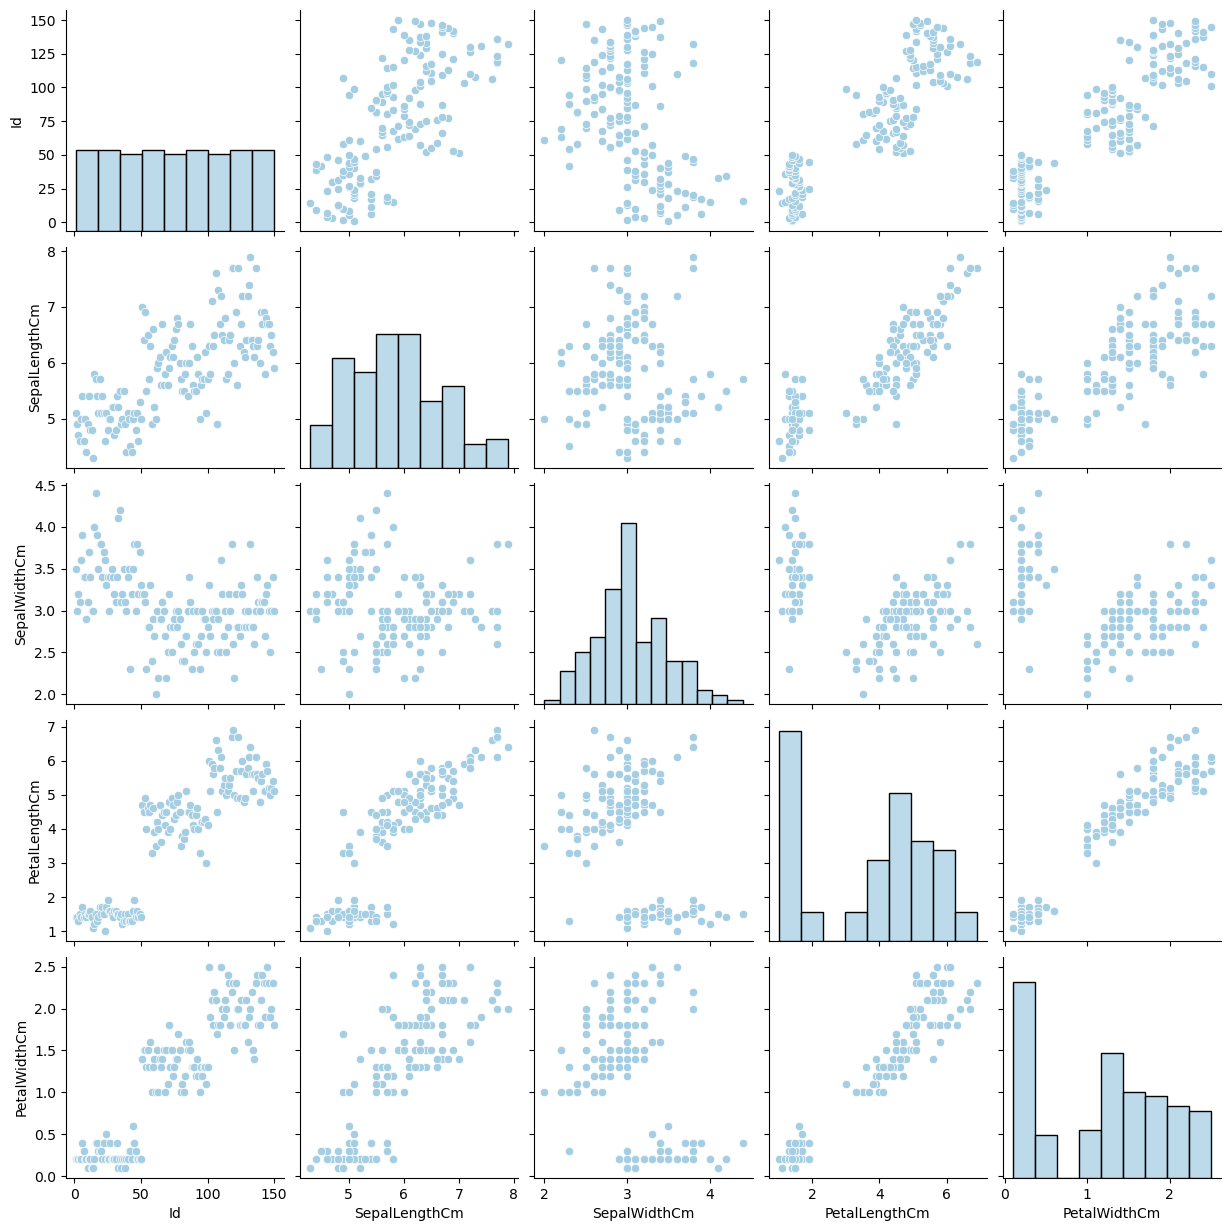

In [168]:
sns.pairplot(df)

# Data Encoding

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

# Selecting dependent and independent features

In [113]:
X=df.drop("species",axis=1)
Y=df['species']
print(X.shape)
print(Y.shape)
print(type(X))
print(type(Y))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Splitting the data into training and testing data

In [114]:
from sklearn.model_selection import train_test_split 

In [115]:
150*0.2

30.0

In [134]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Creating Functions to evaluate Confusion Matrix, Classifcation Report and to generate Training and Testing Score(Accuracy Score)

In [135]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [149]:
def eval_mod(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion_Matrix\n",cm)
    print("Classification_Report\n",classification_report(y_test,y_pred))
    print("Accuracy_Score\n",accuracy_score(y_test,y_pred))

def mscore(model):
    print("Training_Score", model.score(x_train,y_train)) # trainig accuracy
    print("Testing_Score", model.score(x_test,y_test))    # testing accuracy

# Decision tree classifier

In [142]:
# import the library
from sklearn.tree import DecisionTreeClassifier

In [184]:
# building the model
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier()

### generating the training and testing score

In [144]:
mscore(dt)
# The model is overfit(if training score is larger than testing score)

Training_Score 1.0
Testing_Score 0.9666666666666667


In [145]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 0, 0])

### Evaluate the model

In [150]:
eval_mod(y_test,y_pred_dt)

Confusion_Matrix
 [[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy_Score
 0.9666666666666667


### Plot Decision Tree

In [151]:
from sklearn.tree import plot_tree

In [152]:
# cn = class names
# fn = feature names
cn = ['0','1','2']
fn = x_train.columns
print(fn)
print(cn)

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'], dtype='object')
['0', '1', '2']


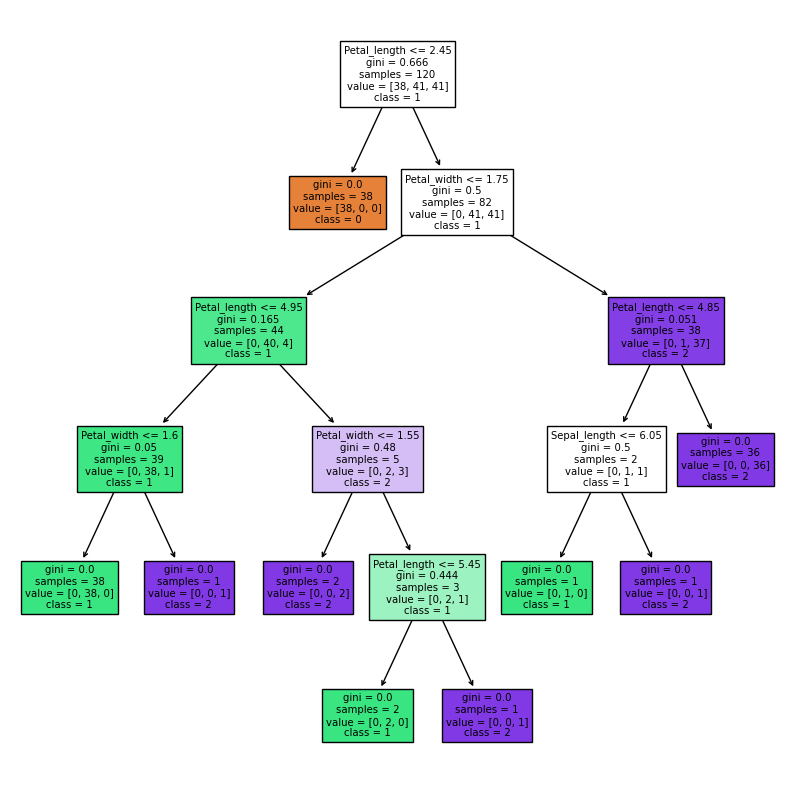

In [154]:
plt.figure(figsize=(10,10))
plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

#### Decision Tree with Entropy with the objective of tackling the Overfiting probelm

In [155]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [156]:
mscore(dt2)

Training_Score 0.9666666666666667
Testing_Score 0.9666666666666667


In [157]:
y_pred_dt2=dt2.predict(x_test)
y_pred_dt2

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 0, 0])

### evaluate the model

In [159]:
eval_mod(y_test,y_pred_dt2)

Confusion_Matrix
 [[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy_Score
 0.9666666666666667


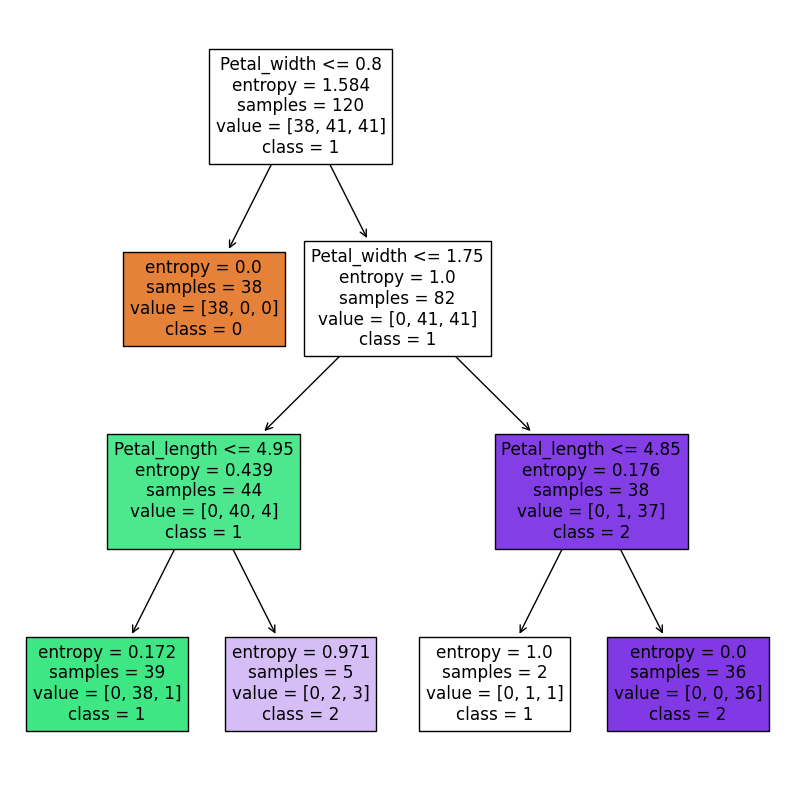

In [160]:
plt.figure(figsize=(10,10))
plot_tree(dt2,feature_names=fn,class_names=cn,filled=True)
plt.show()